In [1]:
import tensorflow as tf
import numpy as np

In [3]:
node1 = tf.constant(3.0)
node2 = tf.constant(4.0)
print(node1, node2)

Tensor("Const_2:0", shape=(), dtype=float32) Tensor("Const_3:0", shape=(), dtype=float32)


In [4]:
sess = tf.Session()
print(sess.run([node1,node2]))

[3.0, 4.0]


In [7]:
node3 = tf.add(node1, node2)
print(sess.run([node3]))

[7.0]


In [10]:
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
adder_node = a + b

In [14]:
print(sess.run(adder_node, {
    a : [1, 2],
    b : [3, 5]
}))

[ 4.  7.]


In [31]:
W = tf.Variable([.3])
b = tf.Variable([-.3])
x = tf.placeholder(tf.float32)
linear_model = W*x + b

In [32]:
init = tf.global_variables_initializer()
sess.run(init)

In [33]:
sess.run(linear_model, {x : [1,2,3]})

array([ 0.        ,  0.30000001,  0.60000002], dtype=float32)

In [34]:
y = tf.placeholder(tf.float32)
loss = tf.reduce_sum((linear_model - y)**2)

print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

23.66


In [37]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))


0.0


In [38]:
sess.run(init)
sess.run([W, b])

[array([ 0.30000001], dtype=float32), array([-0.30000001], dtype=float32)]

In [47]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [48]:
sess.run(init)
for i in range(100):
    sess.run(train, {x : [1, 2, 3], y : [-2, -3, -4]})

In [49]:
sess.run([W, b])

[array([-1.02289987], dtype=float32), array([-0.94794321], dtype=float32)]

#### Estimator

In [67]:
cols = [tf.feature_column.numeric_column('x')]

est = tf.estimator.LinearRegressor(cols)

x_train = np.array([1,2,3])
y_train = np.array([-2.1, -3, -4.1])

x_test = np.array([3,4,6])
y_test = np.array([-4.1, -5.2, -6.1])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8ls2nzsr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe99e5a6c18>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [68]:
train = tf.estimator.inputs.numpy_input_fn({'x' : x_train}, y_train, 2, 100, True)

In [69]:
train()

({'x': <tf.Tensor 'random_shuffle_queue_DequeueUpTo:1' shape=(?,) dtype=int64>},
 <tf.Tensor 'random_shuffle_queue_DequeueUpTo:2' shape=(?,) dtype=float64>)

## MNIST

#### no deep

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [75]:
x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

In [76]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [77]:
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [78]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [79]:
sess = tf.InteractiveSession()

In [81]:
tf.global_variables_initializer().run()

In [82]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})


In [91]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
quality = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [93]:
sess.run(quality, {x: mnist.test.images, y_ :mnist.test.labels})

0.91189998

#### deep

In [63]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [64]:
def init_var(shape):
    init = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init)
#def bias_var(shape):
    

In [65]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding='SAME')

def max_pool2d(x):
    return tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1], padding='SAME')


In [68]:
l_resh = tf.reshape(x, [-1,28,28,1])

w_1 = init_var([5,5,1,32])
l_conv_1 = conv2d(l_resh, w_1)
l_pool_1 = max_pool2d(l_conv_1)
w_2 = init_var([5,5,32,64])
l_conv_2 = conv2d(l_pool_1, w_2)
l_pool_2 = max_pool2d(l_conv_2)

l_resh_2 = tf.reshape(l_pool_2, [-1, 7 * 7 * 64])

In [69]:
l_resh_2.get_shape().as_list()

[None, 3136]

In [70]:
W_dense_1 = init_var([7*7*64, 1000])
b_dense_1 = init_var([1000])
l_dense_1 = tf.nn.relu(tf.matmul(l_resh_2, W_dense_1) + b_dense_1)

prob = tf.placeholder(tf.float32)
l_dropout = tf.nn.dropout(l_dense_1, prob)

W_dense_2 = init_var([1000, 10])
b_dense_2 = init_var([10])
l_dense_2 = tf.matmul(l_dropout, W_dense_2) + b_dense_2

In [71]:
l_dense_2.get_shape().as_list()

[None, 10]

In [75]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=l_dense_2, labels=y_))
train = tf.train.AdamOptimizer().minimize(loss)

correct = tf.equal(tf.argmax(l_dense_2, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [76]:
acc_list = []

In [78]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(200):
        batch = mnist.train.next_batch(50)
        
        if i % 100 == 0:
            acc = accuracy.eval({x : batch[0], y_ : batch[1], prob : 1})
            print(i, acc)
            acc_list.append(acc)
        
        train.run({x: batch[0], y_: batch[1], prob: 0.5})
        
    print('test accuracy %g' % accuracy.eval(feed_dict={
          x: mnist.test.images[:2000], y_: mnist.test.labels[:2000], prob: 1}))
    

0 0.08
100 0.92
test accuracy 0.9455


In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('test accuracy %g' % accuracy.eval(feed_dict={
          x: mnist.test.images[:2000], y_: mnist.test.labels[:2000], prob: 1}))

test accuracy 0.1105


In [24]:
import matplotlib.pyplot as plt

In [49]:
out = tf.nn.softmax(l_dense_2)

In [50]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    

In [51]:
sess.run(out,{x : mnist.train.images[:3], prob : 1})

array([[ 0.04391538,  0.16278249,  0.13569337,  0.04385552,  0.07412696,
         0.03587936,  0.18670125,  0.06223381,  0.16472553,  0.09008644],
       [ 0.05722475,  0.10652111,  0.1372302 ,  0.05671661,  0.07301487,
         0.06862251,  0.15657291,  0.08680851,  0.14812429,  0.10916431],
       [ 0.06689332,  0.13731325,  0.12710707,  0.05089376,  0.06168245,
         0.05903573,  0.17156467,  0.08353387,  0.15076774,  0.09120809]], dtype=float32)

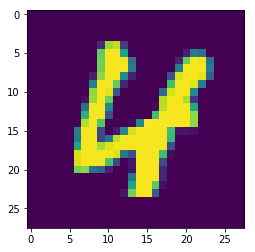

In [52]:
plt.imshow(mnist.train.images[0].reshape(28,28))
plt.show()

In [22]:
mnist.test.labels[:1]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])